In [1]:
'''
Notebook for analyzing evaluation results and generating figures
Note, code is messy currently! 
Evaluation code primarily written to make it easy for me to write into tables by hand. 
Duplicate of other notebooks, but specifically tuned for multi-obj
'''

import imageio
import numpy as np
import os

from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import pandas as pd
import numpy as np

import cv2

In [2]:
main_results_dir = '/om/user/katiemc/occupancy_networks/out/unconditional'
num_objs = 100 
obj_types = ['airplane_chair_100per'] 
reconstruction_eval_splits = ['ood_categories','train', 'test']

In [3]:
metric = 'mean'
split = 'train'
obj_split = 100
for obj_type in obj_types:
    result_dir = f'{main_results_dir}/{obj_type}/generation/{split}/'
    df = pd.read_pickle(result_dir + 'eval_input_full.pkl')
    
    print("Chairs:")
    obj1_df = df[:obj_split]
    df_descr = obj1_df.describe()
    stats = ['iou (mesh)', 'chamfer-L1 (mesh)', 'normals (mesh)']
    for stat in stats: print(f'Stat: {stat}, {df_descr[stat][metric]}')
    
    print("\nAirplanes:")
    obj2_df = df[obj_split:]
    df_descr = obj2_df.describe()
    stats = ['iou (mesh)', 'chamfer-L1 (mesh)', 'normals (mesh)']
    for stat in stats: print(f'Stat: {stat}, {df_descr[stat][metric]}')

Chairs:
Stat: iou (mesh), 0.14216209194622934
Stat: chamfer-L1 (mesh), 0.09743575267493725
Stat: normals (mesh), 0.5777811460835449

Airplanes:
Stat: iou (mesh), 0.11168359485454857
Stat: chamfer-L1 (mesh), 0.09129058212041855
Stat: normals (mesh), 0.6205973745969419


In [4]:
metric = 'max'
split = 'train'
obj_split = 100
for obj_type in obj_types:
    result_dir = f'{main_results_dir}/{obj_type}/generation/{split}/'
    df = pd.read_pickle(result_dir + 'eval_input_full.pkl')
    
    print("Chairs:")
    obj1_df = df[:obj_split]
    df_descr = obj1_df.describe()
    stats = ['iou (mesh)', 'chamfer-L1 (mesh)', 'normals (mesh)']
    for stat in stats: print(f'Stat: {stat}, {df_descr[stat][metric]}')
    
    print("\nAirplanes:")
    obj2_df = df[obj_split:]
    df_descr = obj2_df.describe()
    stats = ['iou (mesh)', 'chamfer-L1 (mesh)', 'normals (mesh)']
    for stat in stats: print(f'Stat: {stat}, {df_descr[stat][metric]}')

Chairs:
Stat: iou (mesh), 0.6435079574584961
Stat: chamfer-L1 (mesh), 0.18674501776695251
Stat: normals (mesh), 0.8421423789313343

Airplanes:
Stat: iou (mesh), 0.40890178084373474
Stat: chamfer-L1 (mesh), 0.22537513077259064
Stat: normals (mesh), 0.7677663823754749


In [5]:
metric = 'mean'
split = 'test'
obj_split = 100
for obj_type in obj_types:
    result_dir = f'{main_results_dir}/{obj_type}/generation/{split}/'
    df = pd.read_pickle(result_dir + 'eval_input_full.pkl')
    
    print("Chairs:")
    obj1_df = df[:obj_split]
    df_descr = obj1_df.describe()
    stats = ['iou (mesh)', 'chamfer-L1 (mesh)', 'normals (mesh)']
    for stat in stats: print(f'Stat: {stat}, {df_descr[stat][metric]}')
    
    print("\nAirplanes:")
    obj2_df = df[obj_split:]
    df_descr = obj2_df.describe()
    stats = ['iou (mesh)', 'chamfer-L1 (mesh)', 'normals (mesh)']
    for stat in stats: print(f'Stat: {stat}, {df_descr[stat][metric]}')

Chairs:
Stat: iou (mesh), 0.12144163778284564
Stat: chamfer-L1 (mesh), 0.10077324685640633
Stat: normals (mesh), 0.5762455903818378

Airplanes:
Stat: iou (mesh), 0.11304634970150265
Stat: chamfer-L1 (mesh), 0.10060372938223314
Stat: normals (mesh), 0.6011275886547844


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x2b31f2ce1c50>]],
      dtype=object)

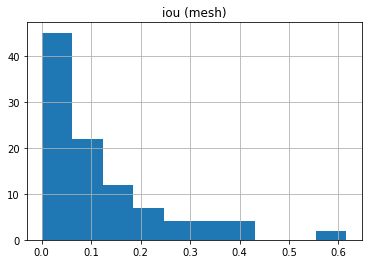

In [6]:
attr = "iou (mesh)"
obj1_df.hist(attr)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x2b31f2ce1ed0>]],
      dtype=object)

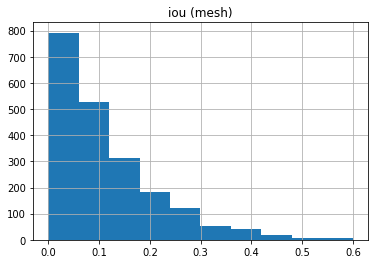

In [7]:
attr = "iou (mesh)"
obj2_df.hist(attr)

In [8]:
def plot_gt(obj_name, ax,
            view_file = '023.jpg', shapenet_dir='/om/user/katiemc/occupancy_networks/data/ShapeNet/02691156/'):
    
    img = cv2.imread(f'{shapenet_dir}{obj_name}/img_choy2016/{view_file}')
    ax.imshow(img)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.set_frame_on(False)
    ax.tick_params(top=False, left=False, bottom=False, right=False)

def plot_rendering(mesh_dir, obj_name, ax,
                  view_idx=0):
    # help rotating image: https://stackoverflow.com/questions/31401812/matplotlib-rotate-image-file-by-x-degrees
    img = Image.open(f'{mesh_dir}{obj_name}_{view_idx}.png')
    if view_idx == 0: img = img.rotate(90) # Rotates counter clock-wise.
    ax.imshow(img)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.set_frame_on(False)
    ax.tick_params(top=False, left=False, bottom=False, right=False)
    
def plot_uncond_sample(img_path, ax,rotate=True):
    # help rotating image: https://stackoverflow.com/questions/31401812/matplotlib-rotate-image-file-by-x-degrees
    img = Image.open(img_path)
    if rotate: img = img.rotate(90) # Rotates counter clock-wise.
    ax.imshow(img)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.set_frame_on(False)
    ax.tick_params(top=False, left=False, bottom=False, right=False)

In [9]:
!pip3 install seaborn

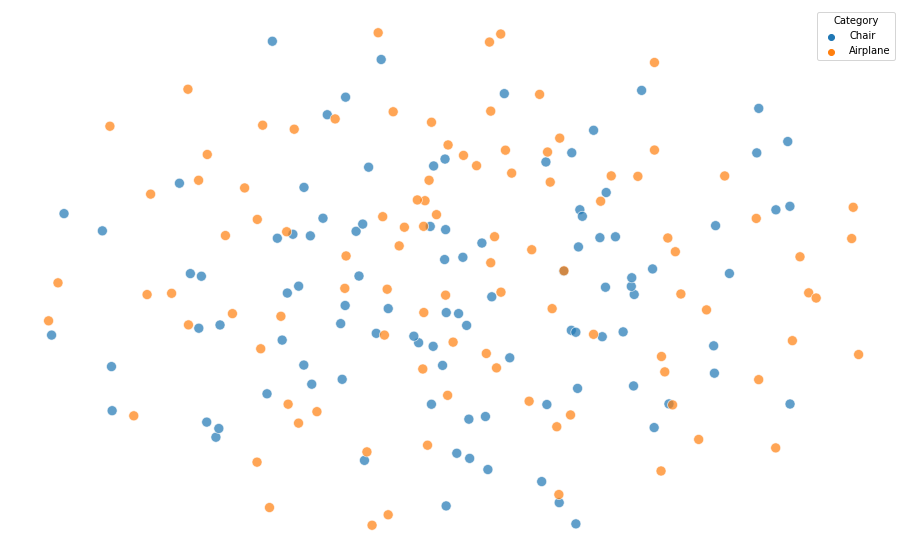

In [11]:
import seaborn as sns

# modified from: https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-\
#    and-t-sne-in-python-8ef87e7915b
tsne_data_pth = f'{main_results_dir}/airplane_chair_100per/tsne_embs_zCodes_train.csv'

emb_df = pd.read_csv(tsne_data_pth)
num_classes = 2

plot_path = f'./multiObj_tsne.png'

emb_df['Category'] = emb_df['id']
plt.figure(figsize=(16, 10))
g = sns.scatterplot(
    x="emb1", y="emb2",
    hue="Category",
    data=emb_df,
    alpha=0.7,
    s=100 # style params from: https://stackoverflow.com/questions/34796451/changing-the-marker-size-in-python-seaborn-lmplot 
)

#CHANGE POINT + LEGEND SIZE

plt.xlabel("")
plt.ylabel("")
plt.axis("off")
plt.savefig(plot_path)

In [12]:
# unconditional samples
view_idx = 0# use consistent view 
# break up uncond samples over page 
rows = 2 
cols = 5

obj_type = 'airplane_chair_100per'

f = plt.figure(figsize=(8, 4), dpi=600)
gs0 = gridspec.GridSpec(rows, cols, figure=f)

for x in range(rows):
    for y in range(cols):
        ax = f.add_subplot(gs0[x, y])
        uncond_path = f'{main_results_dir}/{obj_type}/uncond_gen/uncond_sample_{x+y}_{view_idx}.png'
        plot_uncond_sample(uncond_path, ax, rotate=view_idx==0)
        ax.axis('off')
# plt.show()
plt.axis('off')
plt.close(f)
f.tight_layout()
f.savefig(f'./uncond_samples_{obj_type}.png', bbox='tight', bbox_inches='tight', pad_inches=0.)

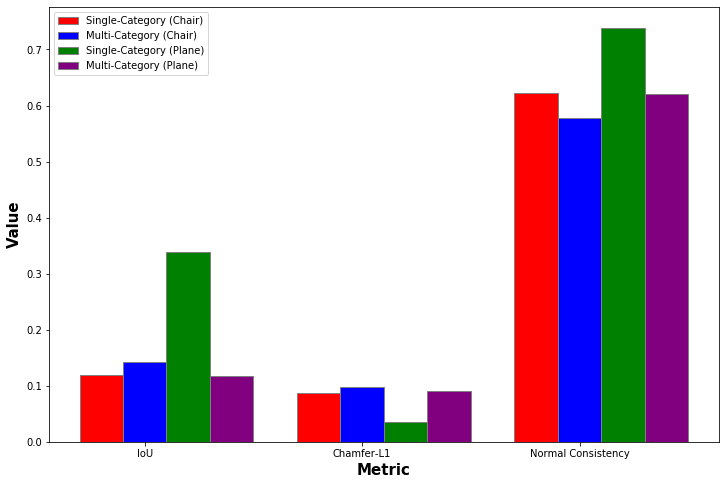

In [13]:
# help from: https://www.geeksforgeeks.org/bar-plot-in-matplotlib/
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.2
fig = plt.subplots(figsize =(12, 8))
 
# set height of bar (according to metrics)
singChair = [0.120, 0.087, 0.623]
multiChair =[0.142, 0.0974,0.578]
singPlane = [0.338, 0.035, 0.739]
multiPlane = [0.117, 0.091, 0.621]
 
# Set position of bar on X axis
br1 = np.arange(len(singChair))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
 
# Make the plot
plt.bar(br1, singChair, color ='r', width = barWidth,
        edgecolor ='grey', label ='Single-Category (Chair)')
plt.bar(br2, multiChair, color ='b', width = barWidth,
        edgecolor ='grey', label ='Multi-Category (Chair)')
plt.bar(br3, singPlane, color ='g', width = barWidth,
        edgecolor ='grey', label ='Single-Category (Plane)')
plt.bar(br4, multiPlane, color ='purple', width = barWidth,
        edgecolor ='grey', label ='Multi-Category (Plane)')
 
# Adding Xticks
plt.xlabel('Metric', fontweight ='bold', fontsize = 15)
plt.ylabel('Value', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(singChair))],
        ['IoU', 'Chamfer-L1', 'Normal Consistency'])
 
plt.legend()
# plt.show()
plt.savefig(f'./trainingResMultiComp.png', bbox='tight', bbox_inches='tight', pad_inches=0.)

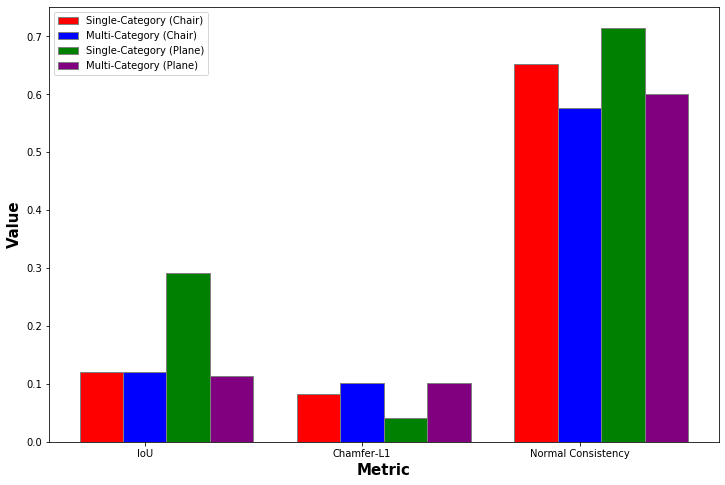

In [15]:
# help from: https://www.geeksforgeeks.org/bar-plot-in-matplotlib/
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.2
fig = plt.subplots(figsize =(12, 8))
 
# set height of bar (according to metrics)
singChair = [0.120, 0.083, 0.652]
multiChair =[0.121, 0.101, 0.576]
singPlane = [0.291, 0.041, 0.715]
multiPlane = [0.113, 0.101, 0.601]
 
# Set position of bar on X axis
br1 = np.arange(len(singChair))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
 
# Make the plot
plt.bar(br1, singChair, color ='r', width = barWidth,
        edgecolor ='grey', label ='Single-Category (Chair)')
plt.bar(br2, multiChair, color ='b', width = barWidth,
        edgecolor ='grey', label ='Multi-Category (Chair)')
plt.bar(br3, singPlane, color ='g', width = barWidth,
        edgecolor ='grey', label ='Single-Category (Plane)')
plt.bar(br4, multiPlane, color ='purple', width = barWidth,
        edgecolor ='grey', label ='Multi-Category (Plane)')
 
# Adding Xticks
plt.xlabel('Metric', fontweight ='bold', fontsize = 15)
plt.ylabel('Value', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(singChair))],
        ['IoU', 'Chamfer-L1', 'Normal Consistency'])
 
plt.legend()
# plt.show()
plt.savefig(f'./testingResMultiComp.png', bbox='tight', bbox_inches='tight', pad_inches=0.)